In [1]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Common Tools
from sklearn.preprocessing import LabelEncoder
from collections import Counter

#Algorithms
from sklearn import ensemble, tree, svm, naive_bayes, neighbors, linear_model, gaussian_process, neural_network
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Model
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
#from sklearn.ensemble import VotingClassifier

#Configure Defaults
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\hiroa\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train = pd.read_csv('./train.csv')
train.shape

(200000, 202)

In [ ]:
test = pd.read_csv('./test.csv')
test.shape

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
train.info()
print('_'*40)
test.info()

In [ ]:
train.describe()

In [ ]:
test.describe()

In [ ]:
train.describe(include=['O'])

In [ ]:
test.describe(include=['O'])

In [11]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning) 

In [ ]:
# 評価指標をroc_auc に設定
%run -i AutoClassifier_transaction.py

モデルデータのOriginalの特徴量(X): (200000, 200)
モデルデータの正解ラベルの個数
0    179902
1     20098
Name: target, dtype: int64
モデルデータの欠損値の補完後の特徴量(X_ohe): (200000, 200)


In [3]:
### Keras を実行
import sklearn 
print (sklearn.__version__)

0.19.1


In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./data"))

# Any results you write to the current directory are saved as output.
import argparse
import numpy as np
import pandas as pd
#import tensorflow as tf

from sklearn.preprocessing import Imputer
#from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, auc
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Add, Input, Dense, Activation, Dropout, Flatten, BatchNormalization, Concatenate

#tf.enable_eager_execution()
#tf.logging.set_verbosity(tf.logging.INFO)

import pandas as pd
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")
print(train_df.columns)
print(test_df.columns)
#ss0=train_df[train_df['target']==0].sample(n=50000)
#ss1=train_df[train_df['target']==1].sample(n=150000, replace=True)
#train_df.append([ss0, ss1], ignore_index=True)
weights = (1/20000)*train_df.target.values + (1/180000)*(1-train_df.target.values)
train_df = pd.DataFrame(train_df.sample(frac=2,weights=weights, replace=True).values, columns=train_df.columns)
#train_df.set_index(train_df.index, inplace=True)
#train_df = train_df.reindex()
#train_df['target'] = 1-train_df['target']
print(train_df)
train_df.drop("ID_code", axis=1, inplace=True)
#y_train = pd.get_dummies(train_df, columns=['target'],dtype=np.int32)
#y_train = np.asarray(y_train.values)
y_train = train_df.target.values
train_df.drop("target", axis=1, inplace=True)
train_df.drop("var_45", axis=1, inplace=True)
train_df.drop("var_68", axis=1, inplace=True)
tr_df = train_df.apply(lambda x: [y if y < 60.0 else 60.0 for y in x])
train_df = tr_df.apply(lambda x: [y if y > -60.0 else -60.0 for y in x])

df = train_df.append(train_df.std(), ignore_index=True)
df_sorted = df.T.sort_values(400000, axis=0)
train_df = df_sorted.T
train_df.drop(index=400000, inplace=True)
print(train_df.columns)

test_id = test_df.ID_code
test_df.drop("ID_code", axis=1, inplace=True)
test_df.drop("var_45", axis=1, inplace=True)
test_df.drop("var_68", axis=1, inplace=True)

ts_df = test_df.apply(lambda x: [y if y < 55.0 else 55.0 for y in x])
test_df = ts_df.apply(lambda x: [y if y > -55.0 else -55.0 for y in x])

df = test_df.append(test_df.std(), ignore_index=True)
df_sorted = df.T.sort_values(200000, axis=0)
test_df = df_sorted.T
test_df.drop(index=200000, inplace=True)
print(test_df.columns)

NUM_FEAT = 198
NUM_FEAT1 = 66
NUM_FEAT2 = 99

#scaler = StandardScaler()
#train_df = pd.DataFrame(scaler.fit_transform(train_df))
#test_df = pd.DataFrame(scaler.fit_transform(test_df))
#print(train_df.mean(), train_df.std())
x_train = train_df.values
x_test = test_df.values

x_train = (x_train - x_train.min())/(x_train.max()-x_train.min())
x_test = (x_test - x_test.min())/(x_test.max()-x_test.min())

x_train = np.reshape(x_train, (-1, NUM_FEAT,1))
#y_train = np.reshape(y_train.values, (2000, 100))
x_test = np.reshape(x_test, (-1,NUM_FEAT,1))
#x_test = x_test.values
#x_train = x_train.values
'''
ip = Input(shape=(66,1))
p1 = Dense(32,  activation="elu")(ip)
p1 = Dense(16,  activation="elu")(p1)
p1 = Flatten()(p1)
p2 = Dense(32,  activation="elu")(ip)
p2 = Dense(32,  activation="elu")(p2)
p2 = Flatten()(p2)
p = concatenate([p1,p2])
l1 = Dense(128,  activation="elu")(p)
l2 = Dense(1,  activation="sigmoid")(l1)

model = Model(ip, l2)
'''

model1 = Sequential()
#input 
model1.add(Dense(32, input_shape=(NUM_FEAT1,1)))
model1.add(Activation("elu"))
model1.add(Dropout(0.5))
model1.add(Dense(16))
model1.add(Activation("elu"))
model1.add(Dropout(0.25))
model1.add(Flatten())

model2 = Sequential()
#input 
model2.add(Dense(32, input_shape=(NUM_FEAT1,1)))
model2.add(Activation("elu"))
model2.add(Dropout(0.5))
model2.add(Dense(16))
model2.add(Activation("elu"))
model2.add(Dropout(0.25))
model2.add(Flatten())

model3 = Sequential()
#input 
model3.add(Dense(32, input_shape=(NUM_FEAT1,1)))
model3.add(Activation("elu"))
model3.add(Dropout(0.5))
model3.add(Dense(16))
model3.add(Activation("elu"))
model3.add(Dropout(0.25))
model3.add(Flatten())

merged = Concatenate()([model1.output,model2.output,model3.output])
z = Dense(128, activation="relu")(merged)
z = Dropout(0.25)(z)
z = Dense(1024, activation="relu")(z)
z = Dense(1, activation="sigmoid")(z)

model = Model(inputs=[model1.input, model2.input, model3.input], outputs=z)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

folds = StratifiedShuffleSplit(n_splits=2, test_size=0.25, random_state=31415)
#folds = StratifiedKFold(n_splits=5, random_state=None)
for train_index, test_index in folds.split(x_train, y_train):
    model.fit([x_train[train_index][:,:66], x_train[train_index][:,66:132], x_train[train_index][:,132:]], y_train[train_index], batch_size=100, epochs=100, verbose=2)
    #model.evaluate([x_train[test_index], x_train[test_index]], y_train[test_index], batch_size=100)
    y_pred = model.predict([x_train[test_index][:,:66],x_train[test_index][:,66:132], x_train[test_index][:,132:]])
    y_train=label_binarize(list(y_train), [0,1])
    roc_val = roc_auc_score(y_train[test_index], y_pred)    
    #auc = auc(y_train[test_index], y_pred)
    print("ROC SCORE:",roc_val)#, "AUC:",auc)
    
y_pred_t = model.predict([x_test[:,:66], x_test[:,66:132], x_test[:,132:]])
submission = pd.read_csv('../input/sample_submission.csv', index_col='ID_code', dtype={"target": np.float32})
submission['target'] = y_pred_t
submission.to_csv('submission.csv')

['test.csv', 'train.csv', 'train.csv_feature_importances.csv', 'train.csv_feature_importances.png']


C:\Users\hiroa\Anaconda3\envs\py27\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)
Index(['ID_code', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5',
       'var_6', 'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)
             ID_code target    var_0   var_1    var_2    var_3    var_4  \
0        train_29316      0  13.7063 -6.3712   8.7397    4.687  14.6076   
1       train_101984      0   7.4603 -1.3585  11.9103   7.6412  10.9326   
2        train_64300      1  12.4267 -0.6368    8.106   4.9161   9.6263   
3       train_118460      1  10.4783 -8.2894  12.5244   6.5757  10.2159   
4        train_59490      1   9.0561 -0.3717  12.9475    6.982  13.2059 

Index(['var_91', 'var_108', 'var_103', 'var_12', 'var_148', 'var_161',
       'var_71', 'var_25', 'var_43', 'var_125',
       ...
       'var_160', 'var_48', 'var_187', 'var_61', 'var_70', 'var_120', 'var_97',
       'var_90', 'var_117', 'var_74'],
      dtype='object', length=198)
Index(['var_91', 'var_108', 'var_103', 'var_12', 'var_148', 'var_161',
       'var_71', 'var_25', 'var_43', 'var_125',
       ...
       'var_160', 'var_48', 'var_187', 'var_61', 'var_70', 'var_120', 'var_97',
       'var_90', 'var_117', 'var_74'],
      dtype='object', length=198)
Epoch 1/100
 - 107s - loss: 0.6933 - acc: 0.5006
Epoch 2/100
 - 107s - loss: 0.6932 - acc: 0.5012
Epoch 3/100
 - 99s - loss: 0.6931 - acc: 0.5014
Epoch 4/100
 - 107s - loss: 0.6932 - acc: 0.5010
Epoch 5/100
 - 100s - loss: 0.6932 - acc: 0.5013
Epoch 6/100
 - 111s - loss: 0.6932 - acc: 0.5008
Epoch 7/100
 - 100s - loss: 0.6932 - acc: 0.5018
Epoch 8/100
 - 105s - loss: 0.6932 - acc: 0.5012
Epoch 9/100


KeyboardInterrupt: 

https://www.kaggle.com/anishjosh/dense-model-using-keras

https://www.kaggle.com/silverstone1903/xgboost-baseline

In [1]:
import numpy as np 
import pandas as pd 
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, cohen_kappa_score, precision_score, recall_score, confusion_matrix
import xgboost as xgb

In [2]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [3]:
train_df.shape, test_df.shape

((200000, 202), (200000, 201))

In [4]:
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
train_cols = [c for c in train_df.columns if c not in ["ID_code", "target"]]
y_train = train_df["target"]

In [6]:
y_train.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [7]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1001)

In [8]:
# bayesian hpo
# details: https://xgboost.readthedocs.io/en/latest/parameter.html
params = {'tree_method': 'hist',
 'objective': 'binary:logistic',
 'eval_metric': 'auc',
 'learning_rate': 0.0936165921314771,
 'max_depth': 2,
 'colsample_bytree': 0.3561271102144279,
 'subsample': 0.8246604621518232,
 'min_child_weight': 53,
 'gamma': 9.943467991283027,
 'silent': 1}

In [9]:
%%time

oof_preds = np.zeros(train_df.shape[0])
sub_preds = np.zeros(test_df.shape[0])

feature_importance_df = pd.DataFrame()

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train_df, y_train)):
    
    trn_x, trn_y = train_df[train_cols].iloc[trn_idx], y_train.iloc[trn_idx]
    val_x, val_y = train_df[train_cols].iloc[val_idx], y_train.iloc[val_idx]
    
    dtrain = xgb.DMatrix(trn_x, trn_y, feature_names=trn_x.columns)
    dval = xgb.DMatrix(val_x, val_y, feature_names=val_x.columns)
    
    clf = xgb.train(params=params, dtrain=dtrain, num_boost_round=4000, evals=[(dtrain, "Train"), (dval, "Val")],
        verbose_eval= 100, early_stopping_rounds=50) 
    
    oof_preds[val_idx] = clf.predict(xgb.DMatrix(val_x))
    sub_preds += clf.predict(xgb.DMatrix(test_df[train_cols])) / folds.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    print('\nFold %1d AUC %.6f & std %.6f' %(n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx]), np.std([oof_preds[val_idx]])))
    print('Fold %1d Precision %.6f' %(n_fold + 1, precision_score(val_y, np.round(oof_preds[val_idx])) ))
    print('Fold %1d Recall %.6f' %(n_fold + 1, recall_score(val_y, np.round(oof_preds[val_idx]) )))
    print('Fold %1d F1 score %.6f' % (n_fold + 1,f1_score(val_y, np.round(oof_preds[val_idx]))))
    print('Fold %1d Kappa score %.6f\n' % (n_fold + 1,cohen_kappa_score(val_y, np.round(oof_preds[val_idx]))))
    gc.collect()

print('\nCV AUC score %.6f & std %.6f' % (roc_auc_score(y_train, oof_preds), np.std((oof_preds))))
print('CV Precision score %.6f' % (precision_score(y_train, np.round(oof_preds))))
print('CV Recall score %.6f' % (recall_score(y_train, np.round(oof_preds))))
print('CV F1 score %.6f' % (f1_score(y_train, np.round(oof_preds))))
print('CV Kappa score %.6f' % (cohen_kappa_score(y_train, np.round(oof_preds))))

[0]	Train-auc:0.581105	Val-auc:0.573174
Multiple eval metrics have been passed: 'Val-auc' will be used for early stopping.

Will train until Val-auc hasn't improved in 50 rounds.
[100]	Train-auc:0.821814	Val-auc:0.812672
[200]	Train-auc:0.86227	Val-auc:0.851135
[300]	Train-auc:0.879132	Val-auc:0.865727
[400]	Train-auc:0.890366	Val-auc:0.875487
[500]	Train-auc:0.897197	Val-auc:0.880964
[600]	Train-auc:0.902913	Val-auc:0.885217
[700]	Train-auc:0.907652	Val-auc:0.887971
[800]	Train-auc:0.911096	Val-auc:0.889679
[900]	Train-auc:0.913734	Val-auc:0.891369
[1000]	Train-auc:0.916207	Val-auc:0.892723
[1100]	Train-auc:0.918147	Val-auc:0.894047
[1200]	Train-auc:0.919752	Val-auc:0.895133
[1300]	Train-auc:0.921072	Val-auc:0.895692
[1400]	Train-auc:0.922223	Val-auc:0.896149
[1500]	Train-auc:0.923319	Val-auc:0.89673
[1600]	Train-auc:0.924324	Val-auc:0.897185
[1700]	Train-auc:0.925073	Val-auc:0.897538
[1800]	Train-auc:0.925695	Val-auc:0.897776
[1900]	Train-auc:0.92624	Val-auc:0.897887
Stopping. Best i

In [10]:
print(confusion_matrix(y_train, np.round(oof_preds)))

[[177825   2077]
 [ 13202   6896]]


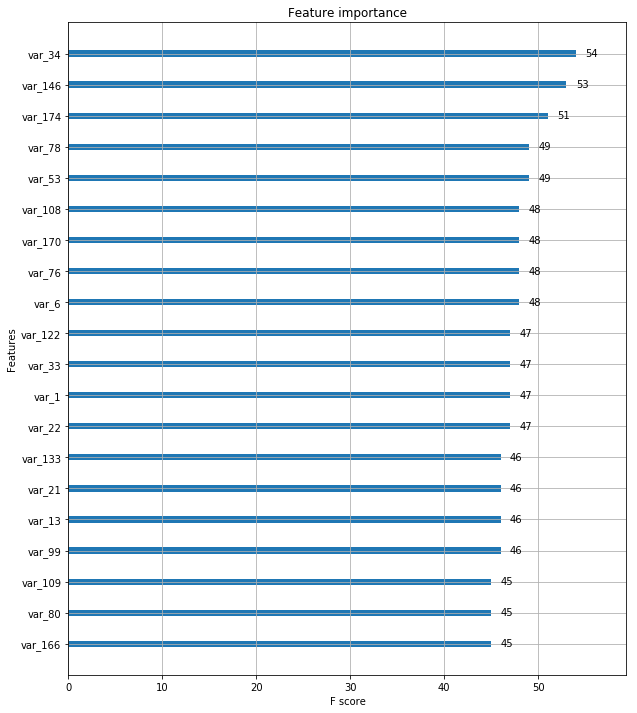

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,12)) 
xgb.plot_importance(clf, max_num_features=20, ax=ax) 

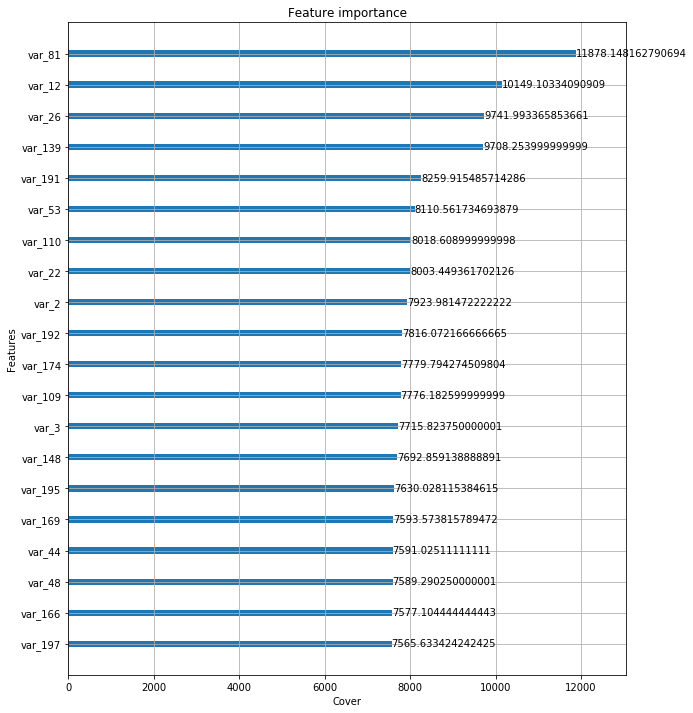

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,12)) 
xgb.plot_importance(clf, max_num_features=20, ax=ax, importance_type="cover", xlabel="Cover")

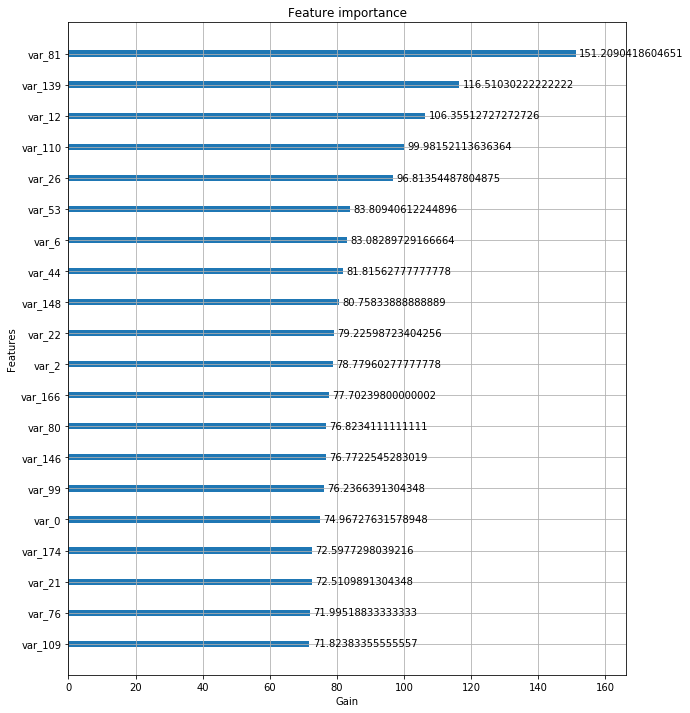

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,12)) 
xgb.plot_importance(clf, max_num_features=20, ax=ax, importance_type="gain", xlabel="Gain")

In [14]:
feature_importance_df.groupby(["feature"])["fscore",].mean().sort_values("fscore", ascending=False)

,fscore
feature,
var_6,51.800000
var_34,51.200000
var_53,50.600000
var_174,49.600000
var_22,48.000000
var_81,48.000000
var_76,48.000000
var_12,47.600000
var_78,47.400000


In [15]:
test_df['target'] = sub_preds

In [16]:
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,0.076653
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760,0.211508
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794,0.238556
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108,0.209133
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846,0.058451


In [17]:
oof_roc = roc_auc_score(y_train, oof_preds)
oof_roc 

0.8972229661998206

In [18]:
ss = pd.DataFrame({"ID_code":test_df["ID_code"], "target":test_df["target"]})
ss.to_csv("sant_xgb_%sFold_%.6f.csv"%(folds.n_splits, oof_roc), index=None)
ss.head()

,ID_code,target
0,test_0,0.076653
1,test_1,0.211508
2,test_2,0.238556
3,test_3,0.209133
4,test_4,0.058451


In [19]:
ss.describe().T

,count,mean,std,min,25%,50%,75%,max
target,200000.0,0.091898,0.141896,0.000197,0.015213,0.03815,0.100088,0.99916
